In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
dataset = pd.read_csv('dataset.csv')

In [6]:
dataset.head(3)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Outcome'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

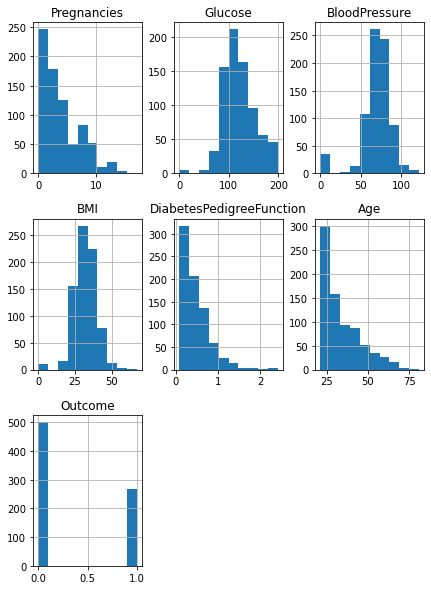

In [7]:
rcParams['figure.figsize'] = 7,10
dataset.hist()

In [8]:
dataset['Outcome'].unique()

array([1, 0], dtype=int64)

Text(0, 0.5, 'Count')

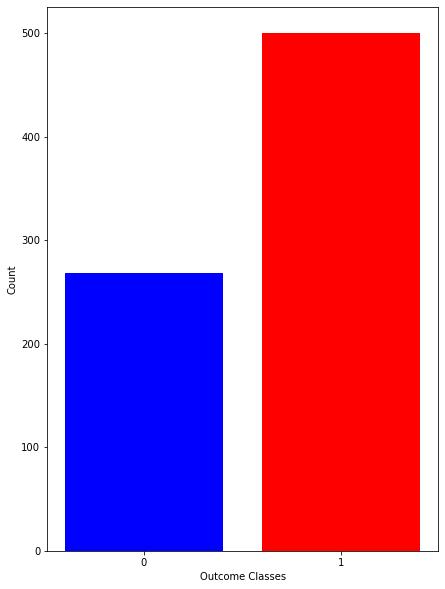

In [9]:
plt.bar(dataset['Outcome'].unique(), dataset['Outcome'].value_counts(), color = ['red', 'blue'])
plt.xticks([0, 1])
plt.xlabel('Outcome Classes')
plt.ylabel('Count')


In [10]:
y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
from sklearn.neural_network import MLPClassifier
Hyper_paramters={'batch_size':["auto",100],'hidden_layer_sizes':[(5,5,5), (5), (6), (4)],
                 'learning_rate_init':[0.001,0.005, 0.01],'max_iter':[500,600]}

NN_Gridsearch_paramters=GridSearchCV(MLPClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,
                                     cv=5,return_train_score=False,verbose=0)

NN_crossvalidation=NN_Gridsearch_paramters.fit(X_train,y_train)

print ("The best paramter combination is ")

print(NN_crossvalidation.best_params_) 

Final_Model=NN_crossvalidation.best_estimator_ 

print("The best AUC score was ")

print(NN_crossvalidation.best_score_)  


The best paramter combination is 
{'batch_size': 'auto', 'hidden_layer_sizes': 5, 'learning_rate_init': 0.001, 'max_iter': 500}
The best AUC score was 
0.8297150957712972


In [13]:
Summary=NN_crossvalidation.cv_results_
df = pd.DataFrame(data=Summary)
df.head()
df.to_excel('CV_Results.xlsx')

In [32]:
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Diabetes", "Healthy"]))

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[87 12]
 [20 35]]
              precision    recall  f1-score   support

    Diabetes       0.81      0.88      0.84        99
     Healthy       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

Accuracy :  0.7922077922077922
Sensitivity :  0.8787878787878788
Specificity :  0.6363636363636364


In [18]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') 

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [19]:
plot_confusion_matrix(cm1,
                          ["Diabetes","Healthy"], 
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False)

NameError: name 'cm1' is not defined

In [28]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sea.distplot(X_train.loc[y_train["Outcome"]==0,feature],
                 kde = False, color = "#004a4d", norm_hist=False,
                 hist_kws = dict(alpha=0.8), bins=40,
                 label="Not Diabetes", ax=ax1);
    sea.distplot(X_train.loc[y_train["Outcome"]==1,feature],
                 kde = False, color = "#7d0101", norm_hist=False,
                 hist_kws = dict(alpha=0.6), bins=40,
                 label="Diabetes", ax=ax1);
    ax2 = fig.add_subplot(gs[0,3])    
    sea.boxplot(X_train[feature], orient="v", color = "#989100",
                width = 0.2, ax=ax2);
    
    ax1.legend(loc="upper right");


AttributeError: 'numpy.ndarray' object has no attribute 'loc'

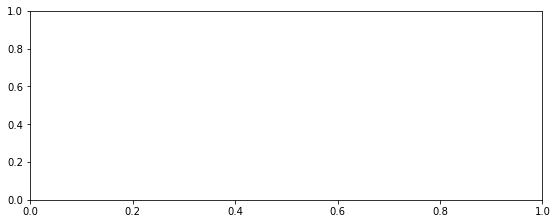

In [29]:
plots("Pregnancies")

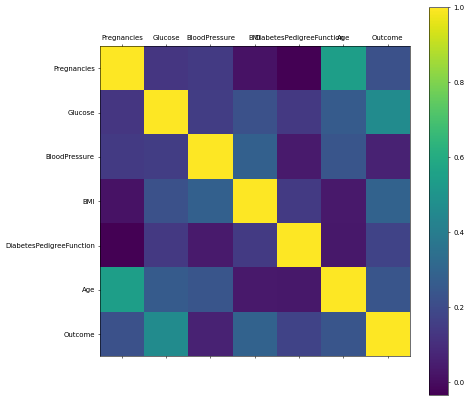

In [34]:
rcParams['figure.figsize'] = 5,10
rcParams["figure.dpi"]= 50
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()